In [22]:
from google.colab import files
uploaded = files.upload()

Saving Finance_Cleaned.csv to Finance_Cleaned (1).csv


In [23]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("Finance_Cleaned.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6055 entries, 0 to 6054
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    6055 non-null   object 
 1   Date             6055 non-null   object 
 2   AccountID        6055 non-null   object 
 3   AccountName      6055 non-null   object 
 4   TransactionType  6054 non-null   object 
 5   Amount           6055 non-null   float64
 6   Currency         6055 non-null   object 
 7   ExchangeRate     6055 non-null   float64
 8   Balance          5985 non-null   float64
 9   Merchant         6054 non-null   object 
 10  Category         6055 non-null   object 
 11  Subcategory      6053 non-null   object 
 12  Country          6053 non-null   object 
 13  City             6053 non-null   object 
 14  IsFraud          5979 non-null   object 
 15  Notes            5252 non-null   object 
 16  CustomerSince    5881 non-null   float64
dtypes: float64(4),

**Scatterplots**

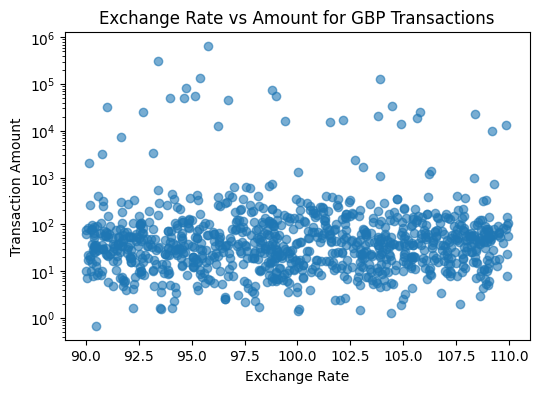

In [25]:
import matplotlib.pyplot as plt

# Filter only GBP rows
gbp_data = df[df['Currency'] == 'GBP'][['Amount', 'ExchangeRate']].dropna()

plt.figure(figsize=(6,4))

# 🔁 swap x and y here
plt.scatter(gbp_data['ExchangeRate'], gbp_data['Amount'], alpha=0.6)

plt.xlabel('Exchange Rate')
plt.ylabel('Transaction Amount')
plt.title('Exchange Rate vs Amount for GBP Transactions')

# Optional (still useful because Amount is skewed)
plt.yscale('log')

plt.show()

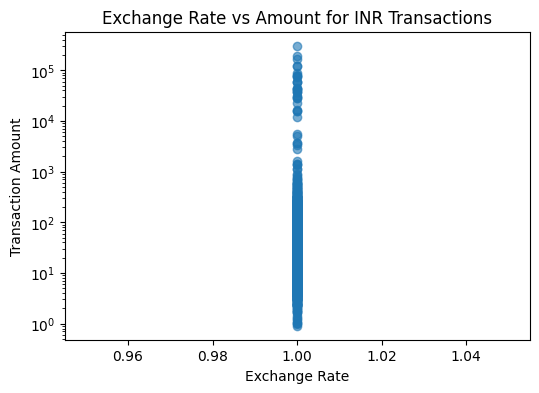

In [26]:
import matplotlib.pyplot as plt

# Filter only INR rows
inr_data = df[df['Currency'] == 'INR'][['Amount', 'ExchangeRate']].dropna()

plt.figure(figsize=(6,4))

# 🔁 swap x and y here
plt.scatter(inr_data['ExchangeRate'], inr_data['Amount'], alpha=0.6)

plt.xlabel('Exchange Rate')
plt.ylabel('Transaction Amount')
plt.title('Exchange Rate vs Amount for INR Transactions')

# Optional (still useful because Amount is skewed)
plt.yscale('log')


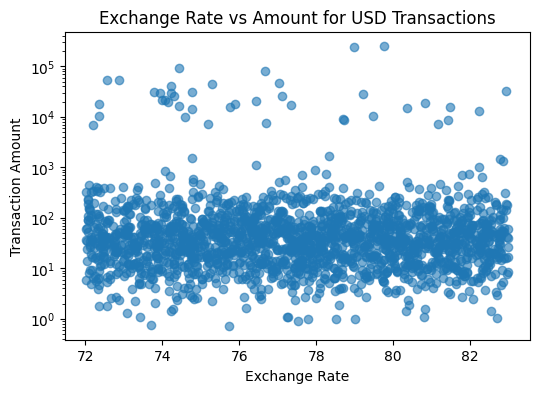

In [27]:
import matplotlib.pyplot as plt

# Filter only USD rows
usd_data = df[df['Currency'] == 'USD'][['Amount', 'ExchangeRate']].dropna()

plt.figure(figsize=(6,4))

# 🔁 swap x and y here
plt.scatter(usd_data['ExchangeRate'], usd_data['Amount'], alpha=0.6)

plt.xlabel('Exchange Rate')
plt.ylabel('Transaction Amount')
plt.title('Exchange Rate vs Amount for USD Transactions')

# Optional (still useful because Amount is skewed)
plt.yscale('log')


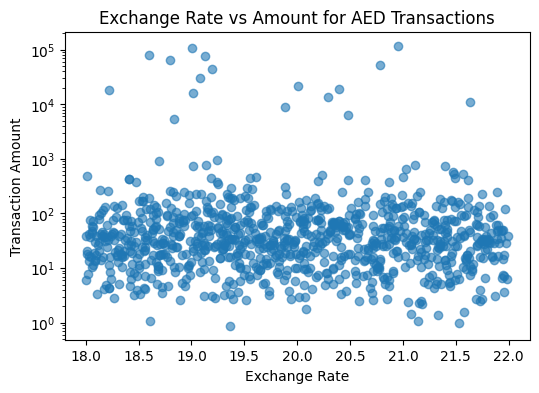

In [28]:
import matplotlib.pyplot as plt

# Filter only AED rows
aed_data = df[df['Currency'] == 'AED'][['Amount', 'ExchangeRate']].dropna()

plt.figure(figsize=(6,4))

# 🔁 swap x and y here
plt.scatter(aed_data['ExchangeRate'], aed_data['Amount'], alpha=0.6)

plt.xlabel('Exchange Rate')
plt.ylabel('Transaction Amount')
plt.title('Exchange Rate vs Amount for AED Transactions')

# Optional (still useful because Amount is skewed)
plt.yscale('log')


**Distribution (Histogram)**

In [29]:
import numpy as np

df["CustomerSince"] = df["CustomerSince"].replace("NA", np.nan)

df["CustomerSince"] = pd.to_numeric(df["CustomerSince"], errors="coerce")

year_data = df["CustomerSince"].dropna()


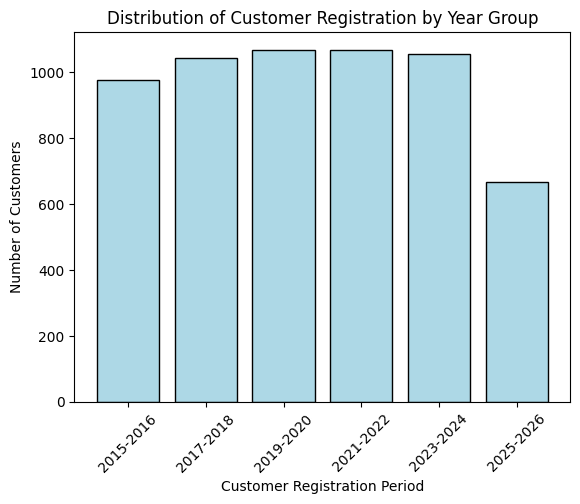

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bins = [2015, 2017, 2019, 2021, 2023, 2025, 2027]   # ขอบช่วง
labels = ["2015-2016", "2017-2018", "2019-2020", "2021-2022", "2023-2024", "2025-2026"]

year_group = pd.cut(year_data, bins=bins, labels=labels, right=False)

counts = year_group.value_counts().sort_index()

plt.figure()
plt.bar(counts.index, counts.values, color='lightblue', edgecolor='black')

plt.xlabel("Customer Registration Period")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Registration by Year Group")

plt.xticks(rotation=45)


plt.show()


**Transaction Amount Comparison (Side-by-Side Boxplot)**

/tmp/ipython-input-749241042.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


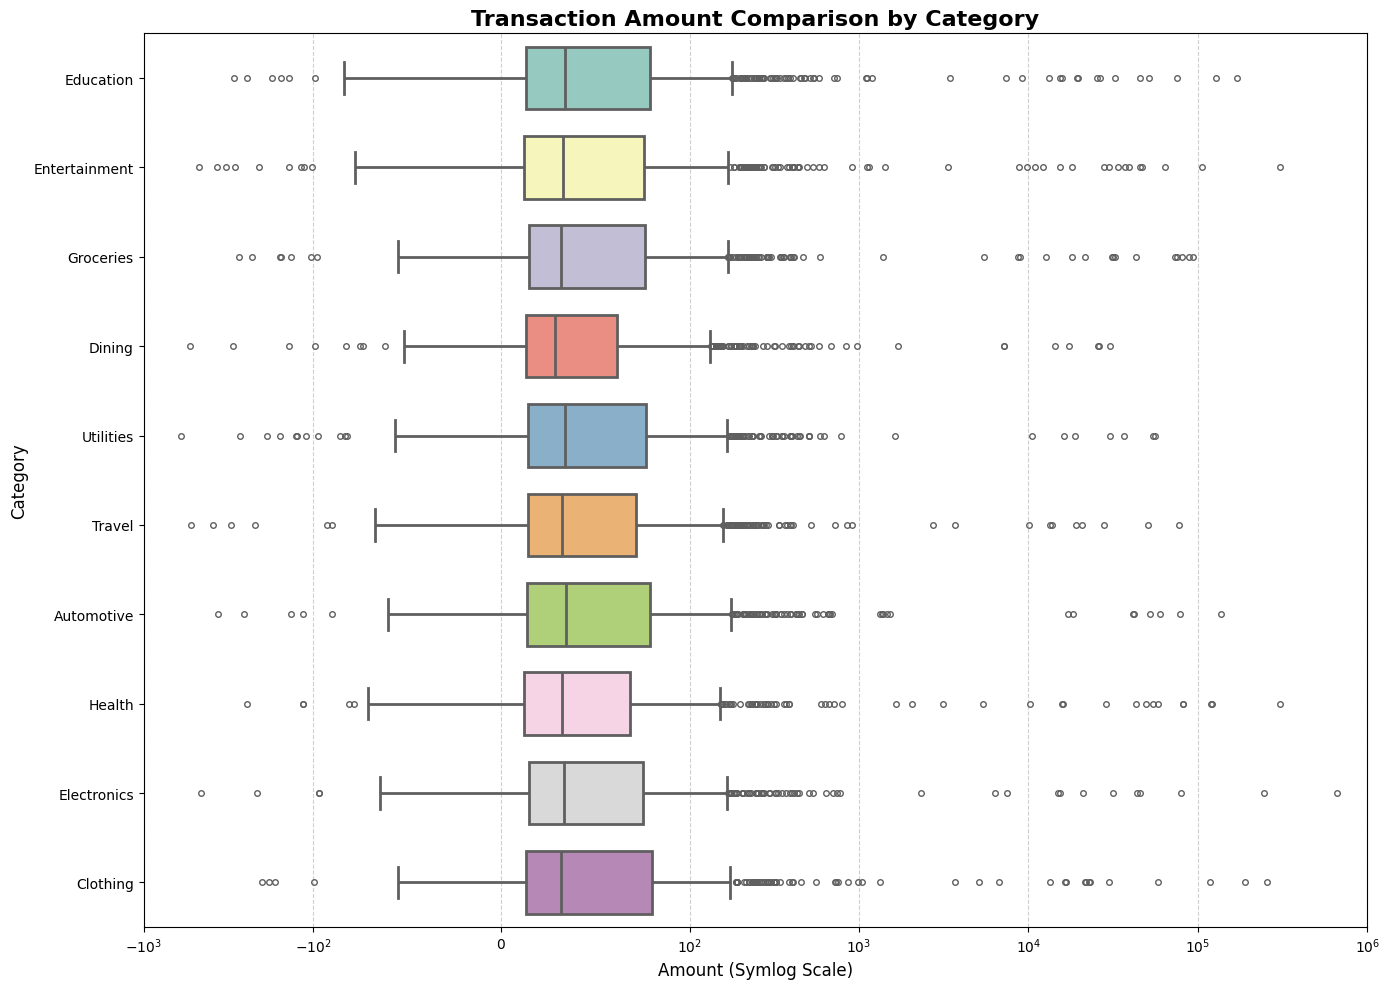

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv('Finance_Cleaned.csv')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df_clean = df.dropna(subset=['Category', 'Amount'])

# Create a horizontal side-by-side comparison
plt.figure(figsize=(14, 10))

# Using a Horizontal layout (y='Category') makes the boxes more visible
sns.boxplot(
    data=df_clean,
    y='Category',
    x='Amount',
    palette='Set3',
    linewidth=2,        # Thicker lines for the "box" look
    fliersize=4,         # Keeps outliers visible as dots
    width=0.7            # Adjusts the spacing between groups
)

# FIX: Symmetrical Log Scale on the X-axis
# This ensures the boxes are NOT squashed into dots
plt.xscale('symlog', linthresh=100)
plt.xlim(-1e3, 1e6)

plt.title('Transaction Amount Comparison by Category', fontsize=16, fontweight='bold')
plt.xlabel('Amount (Symlog Scale)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

/tmp/ipython-input-4265272879.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


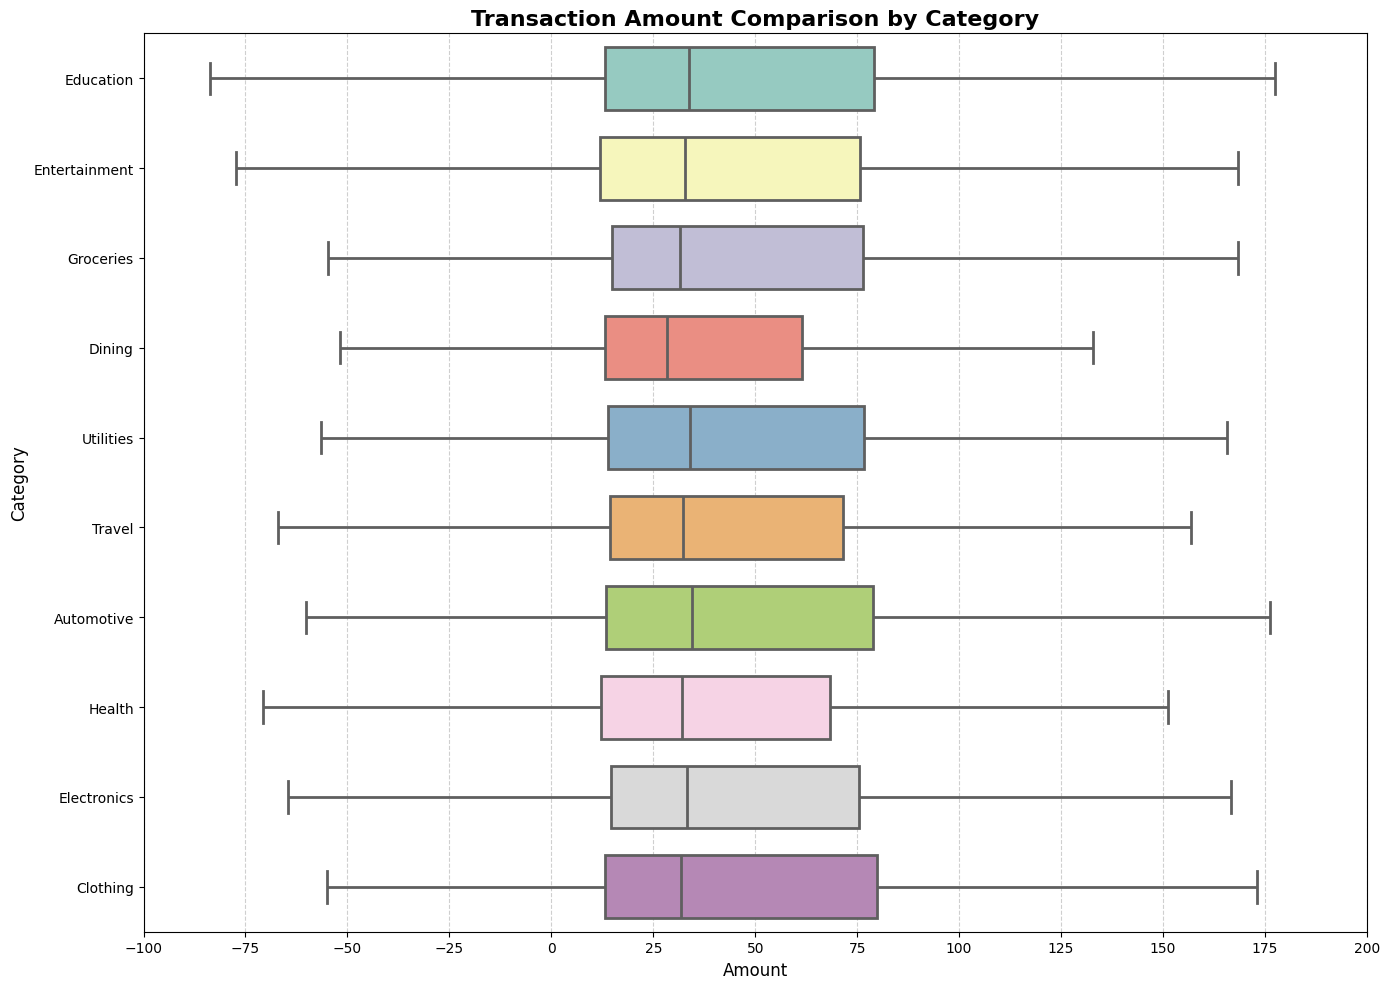

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and clean data
df = pd.read_csv('Finance_Cleaned.csv')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df_clean = df.dropna(subset=['Category', 'Amount'])

# Create a horizontal side-by-side comparison
plt.figure(figsize=(14, 10))

sns.boxplot(
    data=df_clean,
    y='Category',
    x='Amount',
    palette='Set3',
    linewidth=2,
    showfliers=False,
    width=0.7
)

plt.xticks(
    [-100, -75, -50, -25, 0, 25, 50, 75, 100, 125, 150, 175, 200]
)

plt.title('Transaction Amount Comparison by Category', fontsize=16, fontweight='bold')
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
